#Recognition of Phlebology Diseases Based on Photographs

In [ ]:
!pip install opencv-python==4.5.5.64

     |████████████████████████████████| 60.5 MB 79 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!python --version

Python 3.7.13


In [ ]:
!apt install subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1
Suggested packages:
  db5.3-util libapache2-mod-svn subversion-tools
The following NEW packages will be installed:
  libapr1 libaprutil1 libserf-1-1 libsvn1 subversion
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,237 kB of archives.
After this operation, 9,910 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libapr1 amd64 1.6.3-2 [90.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libaprutil1 amd64 1.6.1-2 [84.4 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libserf-1-1 amd64 1.3.9-6 [44.4 kB]
Get:4 http://archive.ubuntu.co

In [ ]:
!svn checkout https://github.com/ishitharaj/newCVIdata/trunk/CVI_newdataset/

A    CVI_newdataset/square3class
A    CVI_newdataset/square3class/1
A    CVI_newdataset/square3class/1/0001cls1.jpg
A    CVI_newdataset/square3class/1/0001cls2.jpg
A    CVI_newdataset/square3class/1/0002cls1.jpg
A    CVI_newdataset/square3class/1/0002cls2.jpg
A    CVI_newdataset/square3class/1/0003cls1.jpg
A    CVI_newdataset/square3class/1/0003cls2.jpg
A    CVI_newdataset/square3class/1/0004cls1.jpg
A    CVI_newdataset/square3class/1/0004cls2.jpg
A    CVI_newdataset/square3class/1/0005cls1.jpg
A    CVI_newdataset/square3class/1/0005cls2.jpg
A    CVI_newdataset/square3class/1/0006cls1.jpg
A    CVI_newdataset/square3class/1/0006cls2.jpg
A    CVI_newdataset/square3class/1/0007cls1.jpg
A    CVI_newdataset/square3class/1/0007cls2.jpg
A    CVI_newdataset/square3class/1/0008cls1.jpg
A    CVI_newdataset/square3class/1/0008cls2.jpg
A    CVI_newdataset/square3class/1/0009cls1.jpg
A    CVI_newdataset/square3class/1/0009cls2.jpg
A    CVI_newdataset/square3class/1/0010cls1.jpg
A    CVI_newdataset/

In [ ]:
from glob import glob
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
import math
from skimage.io import imread
import cv2 as cv2
from tqdm import tqdm

In [ ]:
data_filtered = "/content/CVI_newdataset/square5class"
classes = ['1', '2', '3','4','5']

In [ ]:
class1images = glob(data_filtered+'/'+'1'+'/'+'*')
class2images = glob(data_filtered+'/'+'2'+'/'+'*')
class3images = glob(data_filtered+'/'+'3'+'/'+'*')
class4images = glob(data_filtered+'/'+'4'+'/'+'*')
class5images = glob(data_filtered+'/'+'5'+'/'+'*')

In [ ]:
#train val test split

# class_1 = os.listdir(data_filtered+'/1')
# class_2 = os.listdir(data_filtered+'/2')
# class_3 = os.listdir(data_filtered+'/3')

# for i in range(1,4):
#     for t in ["train", "test"]:
#         !mkdir -p /content/data/CVI-img-datasets/filtered/{t}/{i}/

# base_path = data_filtered
# for i in range(0, len(class_1)):
#   filename = class_1[i]
#   if i <= 45:
#     shutil.copy(f"{base_path}/1/{filename}", f"{base_path}/train/1/{filename}")
#   else:
#     shutil.copy(f"{base_path}/1/{filename}", f"{base_path}/test/1/{filename}")

# for i in range(0, len(class_2)):
#   filename = class_2[i]
#   if i <= 43:
#     shutil.copy(f"{base_path}/2/{filename}", f"{base_path}/train/2/{filename}")
#   else:
#     shutil.copy(f"{base_path}/2/{filename}", f"{base_path}/test/2/{filename}")

# for i in range(0, len(class_3)):
#   filename = class_3[i]
#   if i <= 91:
#     shutil.copy(f"{base_path}/3/{filename}", f"{base_path}/train/3/{filename}")
#   else:
#     shutil.copy(f"{base_path}/3/{filename}", f"{base_path}/test/3/{filename}")



In [ ]:
len(class1images), len(class2images), len(class3images), len(class4images), len(class5images)

(35, 24, 57, 40, 65)

In [ ]:
#load image paths
def load_images(paths):
    tmp = []
    for path in paths:
        tmp.append(imread(path))
    return tmp

In [ ]:
#plot images
def plot_any(arr, title = ''):
    plt.figure(figsize = (15, 25))
    for i in range(len(arr)):
        plt.subplot(1,len(arr),i + 1)
        plt.title(title)
        plt.imshow(arr[i]);

In [ ]:
load_class1images = load_images(class1images[:5])
load_class2images = load_images(class2images[:5])
load_class3images = load_images(class3images[:5])
load_class4images = load_images(class4images[:5])
load_class5images = load_images(class5images[:5])

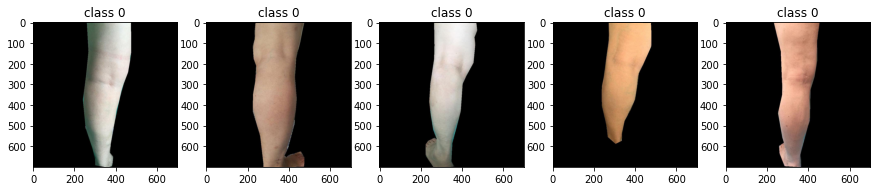

In [ ]:
plot_any(load_class1images, 'class 0')

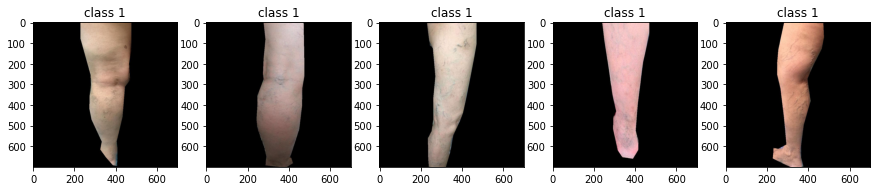

In [ ]:
plot_any(load_class2images, 'class 1')

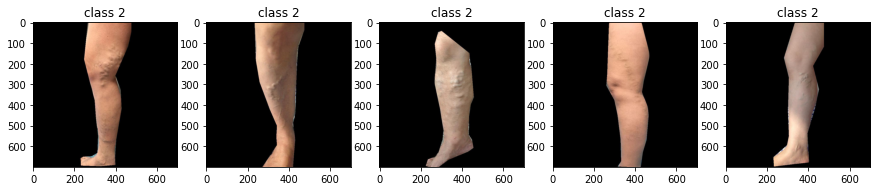

In [ ]:
plot_any(load_class3images, 'class 2')

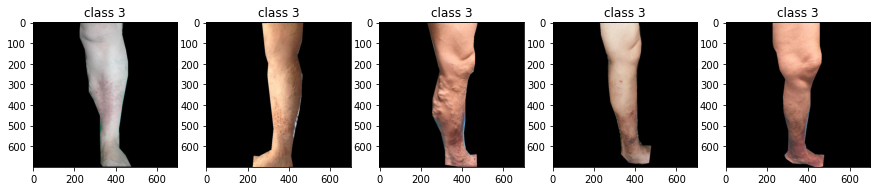

In [ ]:
plot_any(load_class4images, 'class 3')

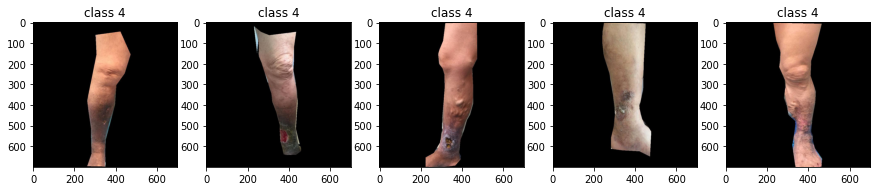

In [ ]:
plot_any(load_class5images, 'class 4')

In [ ]:
cv2.__version__

'4.5.5'

In [ ]:
batch_size = 4
img_height = 350
img_width = 350

In [ ]:
data_path = '/content/CVI_newdataset/square5class'

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 221 files belonging to 5 classes.
Using 177 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 221 files belonging to 5 classes.
Using 44 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['1', '2', '3', '4', '5']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(4, 350, 350, 3)
(4,)


In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 350, 350, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 350, 350, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 175, 175, 16)     0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 175, 175, 32)      4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 87, 87, 64)       

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
45/45 [==============================] - 3s 48ms/step - loss: 1.6287 - accuracy: 0.2768 - val_loss: 1.5588 - val_accuracy: 0.3636
Epoch 2/10
45/45 [==============================] - 2s 39ms/step - loss: 1.4712 - accuracy: 0.3785 - val_loss: 1.4788 - val_accuracy: 0.4091
Epoch 3/10
45/45 [==============================] - 2s 38ms/step - loss: 1.0748 - accuracy: 0.6102 - val_loss: 1.8552 - val_accuracy: 0.2727
Epoch 4/10
45/45 [==============================] - 2s 37ms/step - loss: 0.5323 - accuracy: 0.7853 - val_loss: 2.3137 - val_accuracy: 0.2955
Epoch 5/10
45/45 [==============================] - 2s 38ms/step - loss: 0.3131 - accuracy: 0.8814 - val_loss: 3.0088 - val_accuracy: 0.2955
Epoch 6/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0778 - accuracy: 0.9774 - val_loss: 3.5404 - val_accuracy: 0.3182
Epoch 7/10
45/45 [==============================] - 2s 37ms/step - loss: 0.0201 - accuracy: 0.9887 - val_loss: 4.6300 - val_accuracy: 0.3182
Epoch 8/10
45

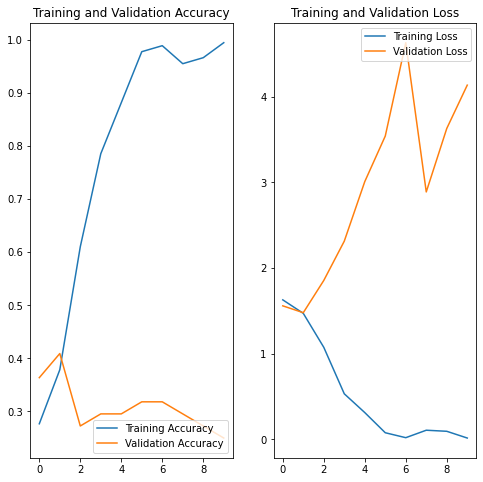

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

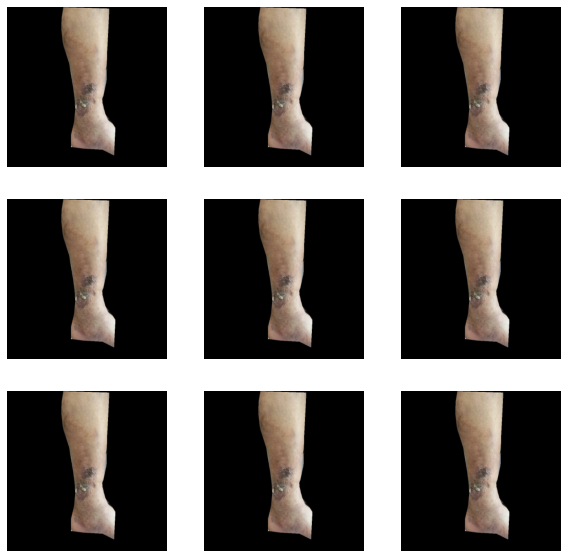

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Dropout

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_5 (Sequential)   (None, 350, 350, 3)       0         
                                                                 
 rescaling_6 (Rescaling)     (None, 350, 350, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 350, 350, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 175, 175, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 175, 175, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 87, 87, 32)       0         
 g2D)                                                 

In [ ]:
epochs = 100
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/100
45/45 [==============================] - 4s 50ms/step - loss: 1.6711 - accuracy: 0.2486 - val_loss: 1.5866 - val_accuracy: 0.2500
Epoch 2/100
45/45 [==============================] - 2s 44ms/step - loss: 1.5632 - accuracy: 0.3220 - val_loss: 1.4795 - val_accuracy: 0.5682
Epoch 3/100
45/45 [==============================] - 2s 44ms/step - loss: 1.5518 - accuracy: 0.3164 - val_loss: 1.5129 - val_accuracy: 0.2500
Epoch 4/100
45/45 [==============================] - 2s 43ms/step - loss: 1.5316 - accuracy: 0.2994 - val_loss: 1.4634 - val_accuracy: 0.4318
Epoch 5/100
45/45 [==============================] - 2s 42ms/step - loss: 1.4887 - accuracy: 0.3277 - val_loss: 1.4128 - val_accuracy: 0.3409
Epoch 6/100
45/45 [==============================] - 2s 43ms/step - loss: 1.5167 - accuracy: 0.3333 - val_loss: 1.3784 - val_accuracy: 0.5227
Epoch 7/100
45/45 [==============================] - 2s 43ms/step - loss: 1.4193 - accuracy: 0.3785 - val_loss: 1.2694 - val_accuracy: 0.5000
Epoch 

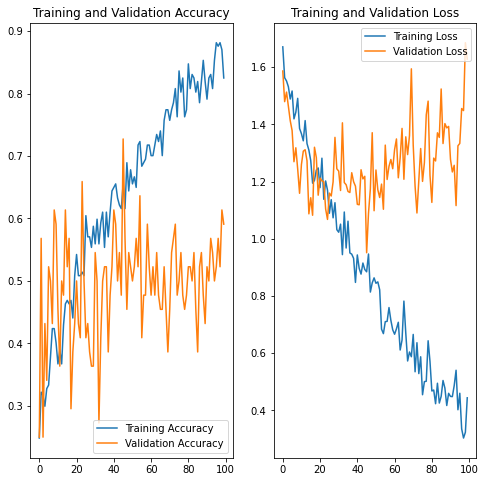

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.1)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
45/45 [==============================] - 3s 48ms/step - loss: 1.6738 - accuracy: 0.2316 - val_loss: 1.5315 - val_accuracy: 0.4318
Epoch 2/50
45/45 [==============================] - 2s 43ms/step - loss: 1.5888 - accuracy: 0.2825 - val_loss: 1.5247 - val_accuracy: 0.4545
Epoch 3/50
45/45 [==============================] - 2s 42ms/step - loss: 1.5440 - accuracy: 0.3051 - val_loss: 1.4544 - val_accuracy: 0.3636
Epoch 4/50
45/45 [==============================] - 2s 43ms/step - loss: 1.4946 - accuracy: 0.3785 - val_loss: 1.4064 - val_accuracy: 0.3864
Epoch 5/50
45/45 [==============================] - 2s 43ms/step - loss: 1.5260 - accuracy: 0.3842 - val_loss: 1.3890 - val_accuracy: 0.5227
Epoch 6/50
45/45 [==============================] - 2s 43ms/step - loss: 1.5163 - accuracy: 0.3446 - val_loss: 1.5082 - val_accuracy: 0.3636
Epoch 7/50
45/45 [==============================] - 2s 44ms/step - loss: 1.4801 - accuracy: 0.3559 - val_loss: 1.3194 - val_accuracy: 0.5682
Epoch 8/50
45

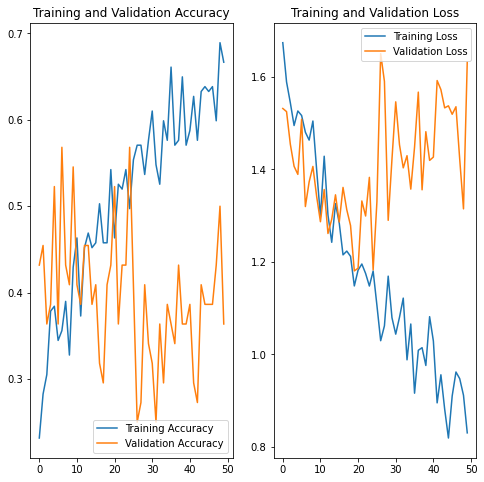

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predict on new data

In [ ]:
# sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
# sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch

# predictions = model.predict(img_array)
# score = tf.nn.softmax(predictions[0])

# print(
#     "This image most likely belongs to {} with a {:.2f} percent confidence."
#     .format(class_names[np.argmax(score)], 100 * np.max(score))
# )